In [57]:
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn import preprocessing
import statsmodels.formula.api as sm

In [2]:
data_path = r'../data/matrix/matrix_consol_v2.zip'
image_path = r'../explore/images/eda2/mc-{cuenca}-{tipo}.png'

In [3]:
df = pd.read_csv(data_path,  parse_dates = ['date'])

In [4]:
df.head()

date  year  month  mc  v_flow_mean  v_loss_cover  v_rainfall_total  \
0 2000-01-01  2000      1   7        230.4      0.000000             334.0   
1 2000-02-01  2000      2   7        272.4      0.000133             400.0   
2 2000-03-01  2000      3   7        321.6      0.000265             319.0   
3 2000-04-01  2000      4   7        310.8      0.000398             248.0   
4 2000-05-01  2000      5   7        410.0      0.000531             302.0   

   v_temperature_mean  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

In [5]:
df.drop(['year','month'], axis = 1, inplace = True)

In [6]:
df.set_index(['mc'], inplace = True)

In [7]:
df.describe()

v_flow_mean  v_loss_cover  v_rainfall_total  v_temperature_mean
count  11520.000000  11520.000000      11520.000000         3360.000000
mean     511.429218      0.027596        222.721662           20.503891
std     1199.817766      0.031275        191.040374            3.749426
min        0.000000      0.000000          0.000000           13.400000
25%       14.947500      0.007964         85.320659           18.400000
50%       59.145000      0.018508        182.495272           19.400000
75%      316.453125      0.033369        298.016710           21.000000
max     9409.426250      0.205491       1499.040000           31.000000

In [8]:
df.isna().sum()

date                     0
v_flow_mean              0
v_loss_cover             0
v_rainfall_total         0
v_temperature_mean    8160
dtype: int64

In [9]:
# Augmented Dickey-Fuller Test (ADF Test)/unit root test
from statsmodels.tsa.stattools import adfuller
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    #print (adf)
    
    p = adf['p-value']
    if p <= signif:
        return True
    else:
        return False


In [101]:
dfc = df.loc[30].copy()

model = 'v_flow_mean~v_loss_cover + v_rainfall_total + v_temperature_mean'
if np.isnan(dfc.iloc[0,3]):
    #dfc.drop(['v_temperature_mean'], axis = 1, inplace = True)
    model = 'v_flow_mean~v_loss_cover + v_rainfall_total'

#dfc.head()
#model
#type(dfc.iloc[0,3])
lm    = sm.ols(formula = model, data = dfc).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            v_flow_mean   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     64.37
Date:                Fri, 03 Jul 2020   Prob (F-statistic):           4.70e-23
Time:                        23:54:27   Log-Likelihood:                -837.95
No. Observations:                 240   AIC:                             1682.
Df Residuals:                     237   BIC:                             1692.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.9165      1.178  

In [116]:
print(f'R2:{lm.rsquared},AIC:{lm.aic},v_loss_cover:{lm.params["v_loss_cover"]}({lm.pvalues["v_loss_cover"]<0.05}),v_rainfall_total:{lm.params["v_rainfall_total"]}({lm.pvalues["v_rainfall_total"]<0.05})')
#print()
#print(lm.pvalues)
#print(lm.params)

R2:0.3519952567284309,AIC:1681.908513597763,v_loss_cover:-243.45777480784056(True),v_rainfall_total:0.037976626646823795(True)


In [10]:
basins = df.index.unique(level = 0)

In [64]:
df.loc[5].head()

date  v_flow_mean  v_loss_cover  v_rainfall_total  v_temperature_mean
mc                                                                            
5  2000-01-01        75.02      0.000000            115.88                 NaN
5  2000-02-01        86.09      0.000130            138.00                 NaN
5  2000-03-01        87.28      0.000261            180.00                 NaN
5  2000-04-01        84.74      0.000391            224.00                 NaN
5  2000-05-01       100.80      0.000521            136.96                 NaN

<ipython-input-66-2513c47d7ed1>:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-66-2513c47d7ed1>:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-66-2513c47d7ed1>:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipy

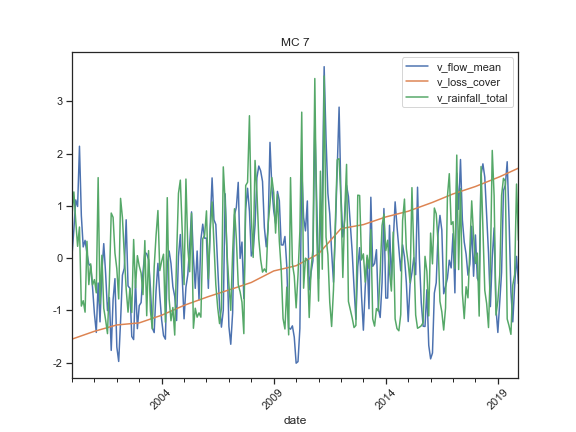

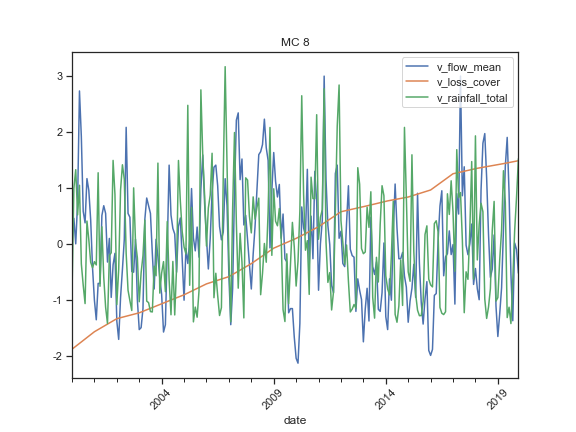

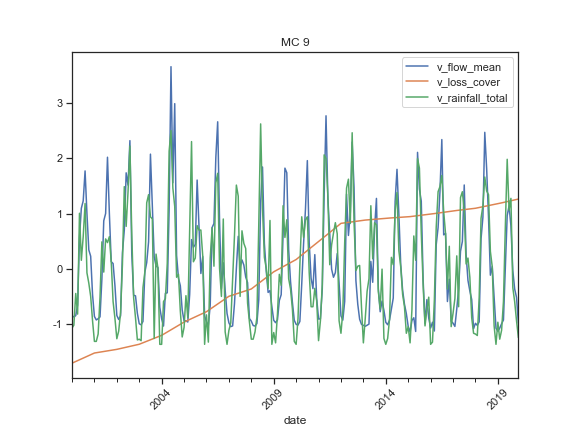

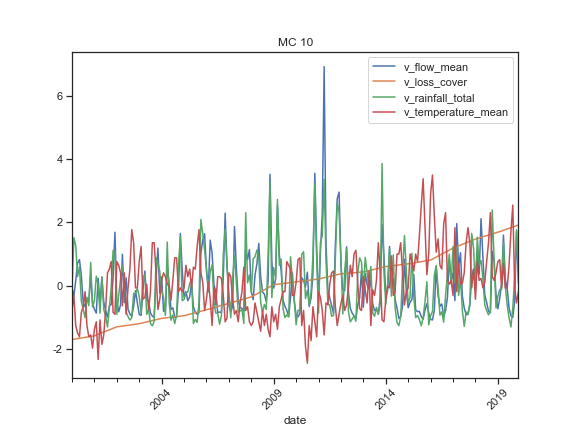

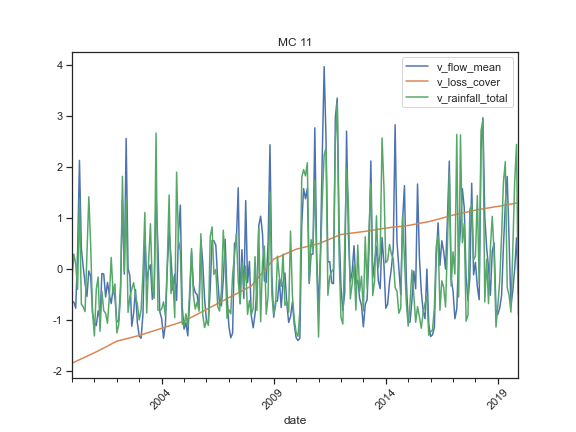

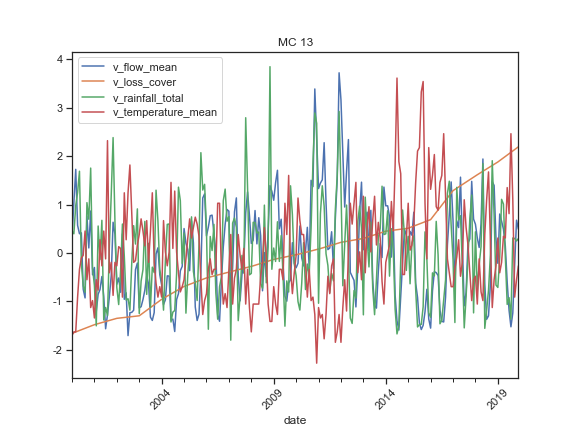

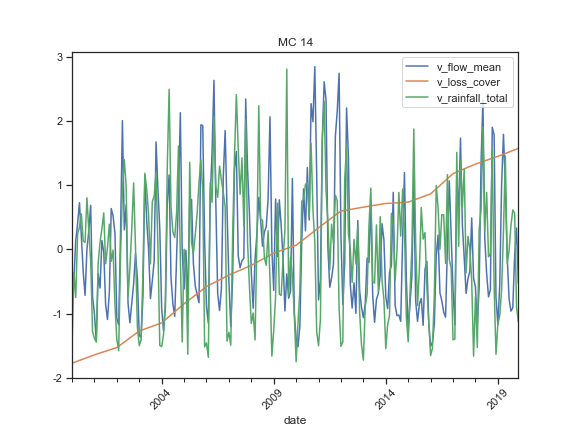

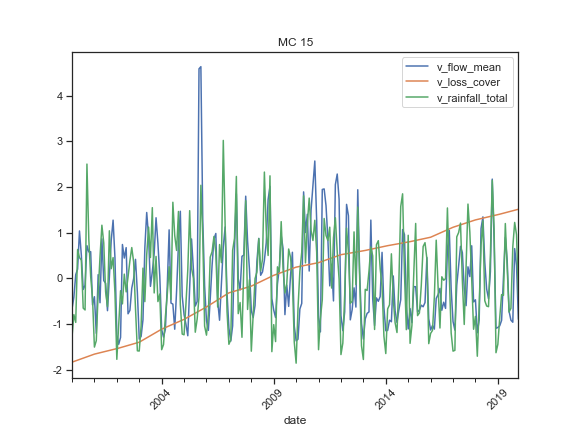

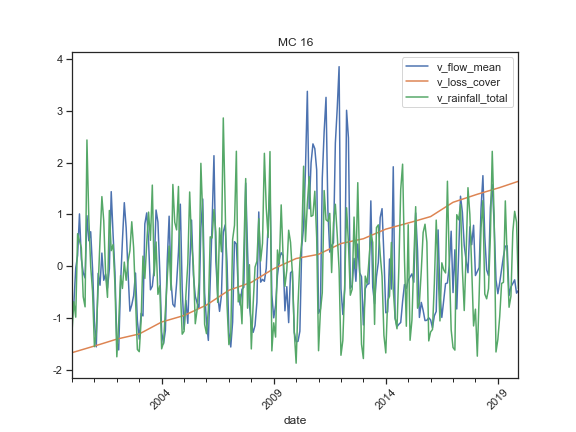

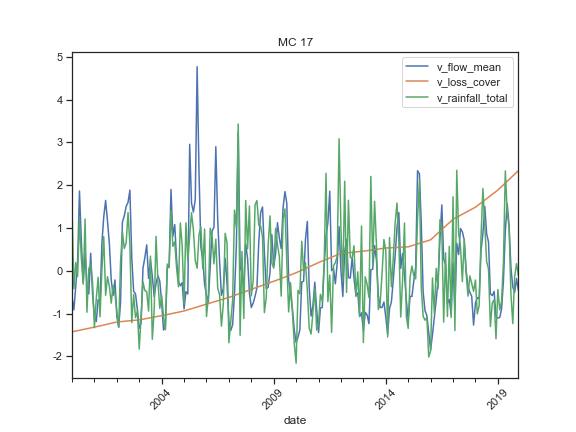

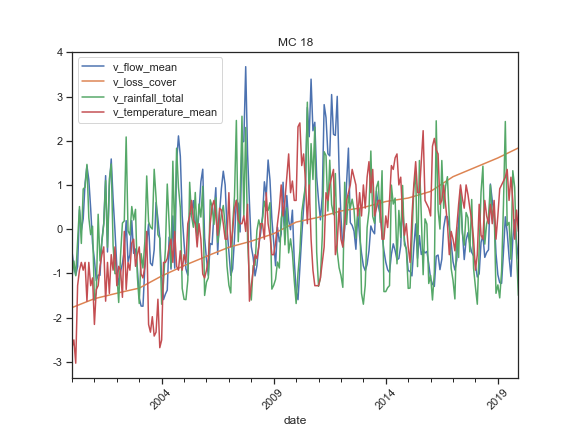

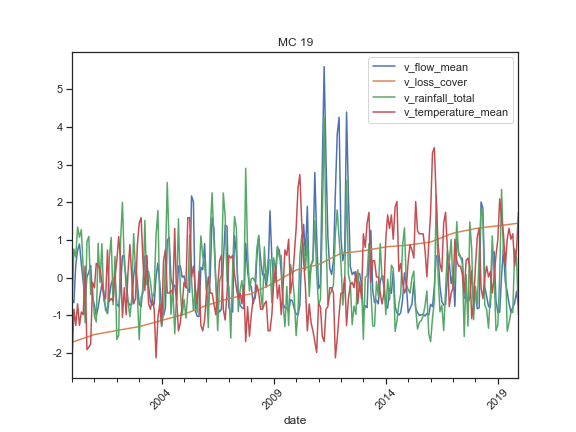

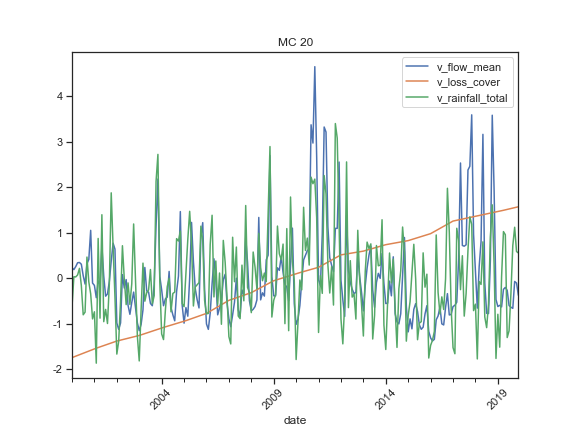

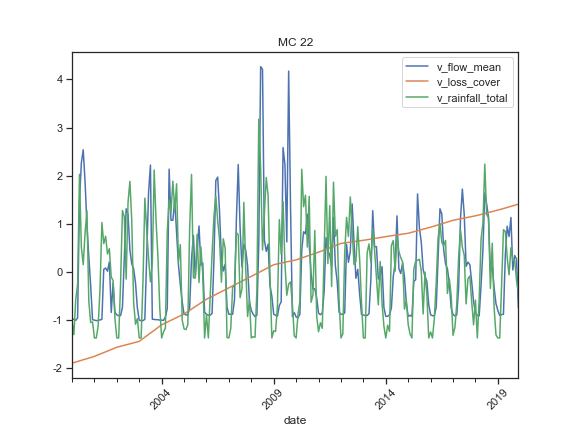

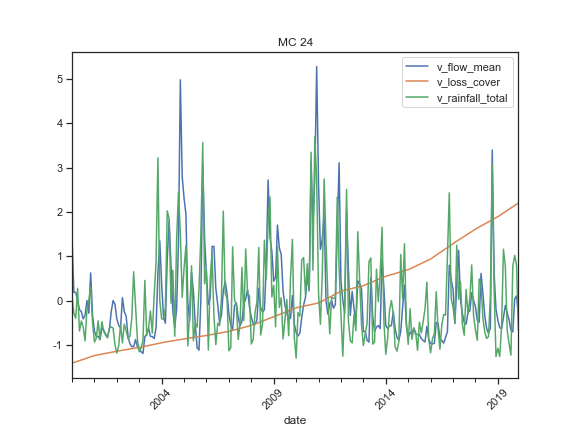

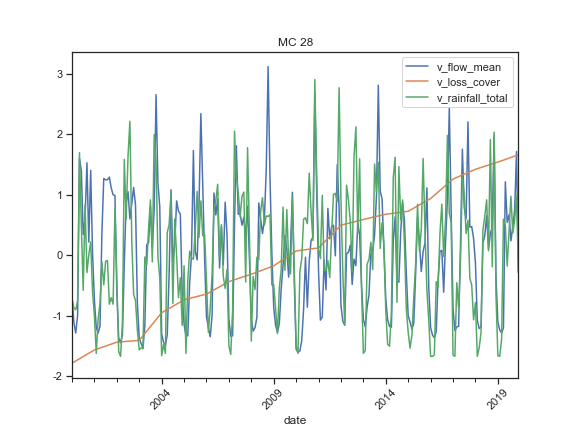

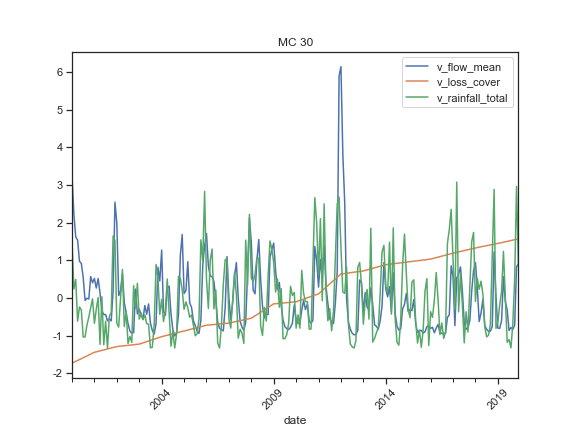

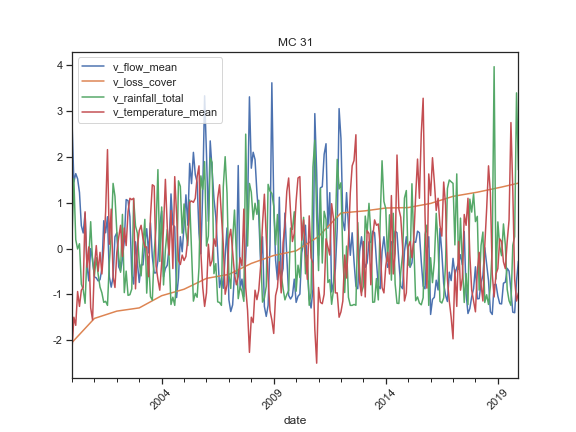

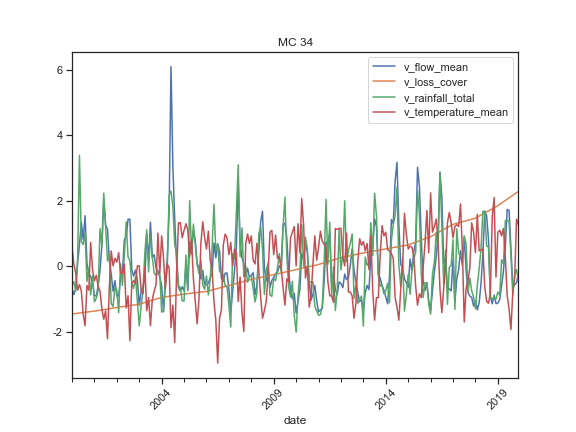

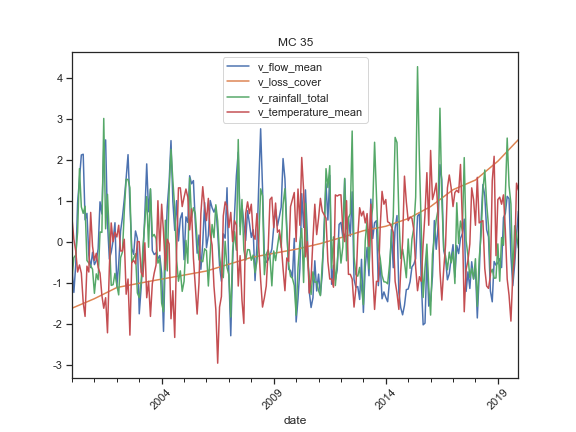

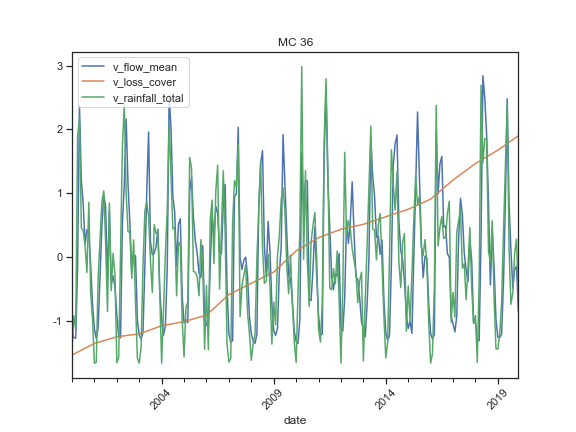

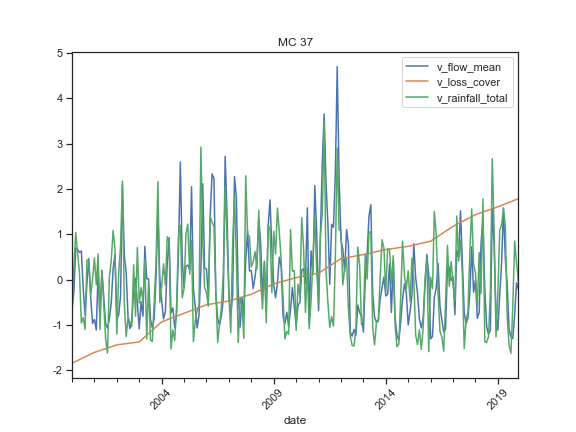

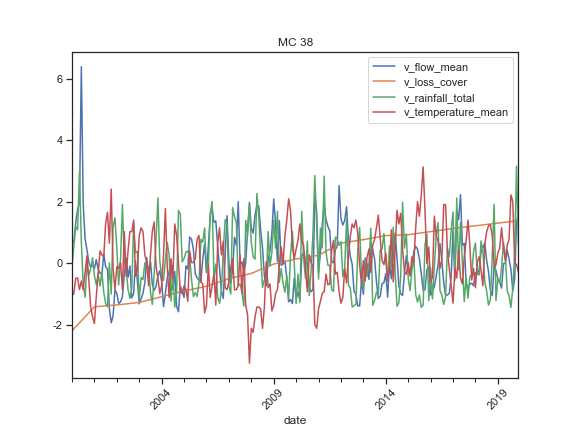

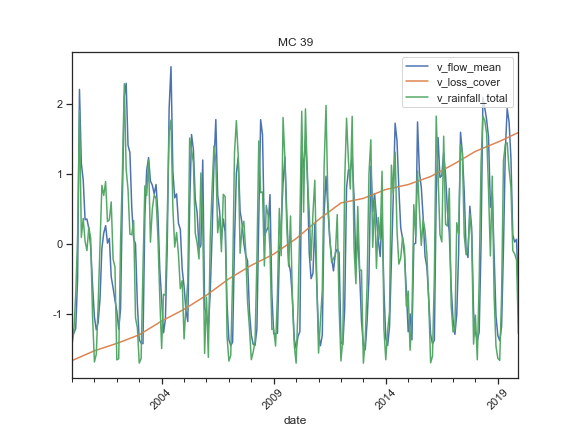

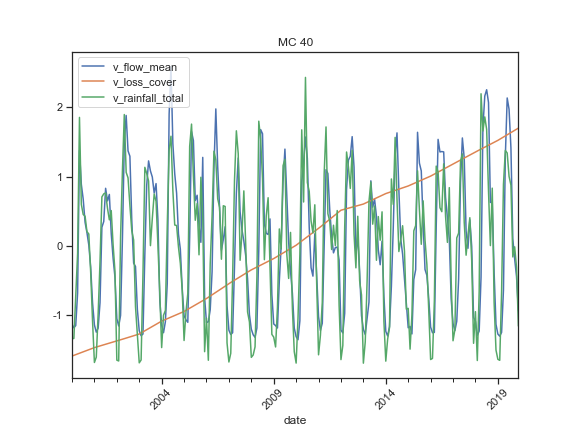

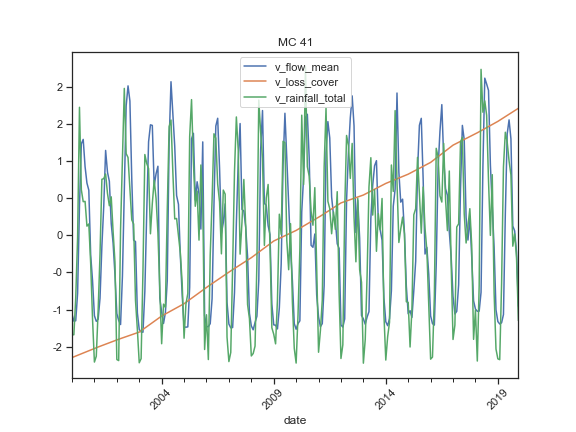

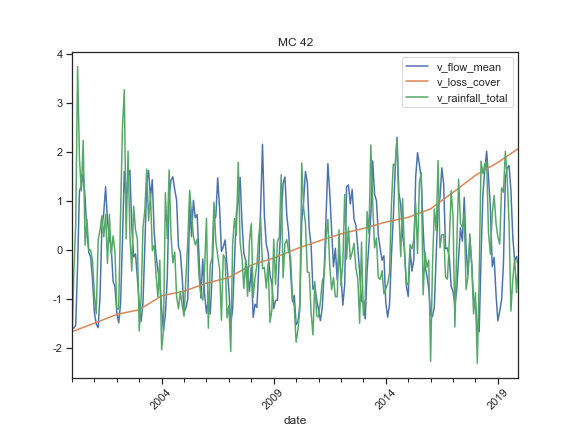

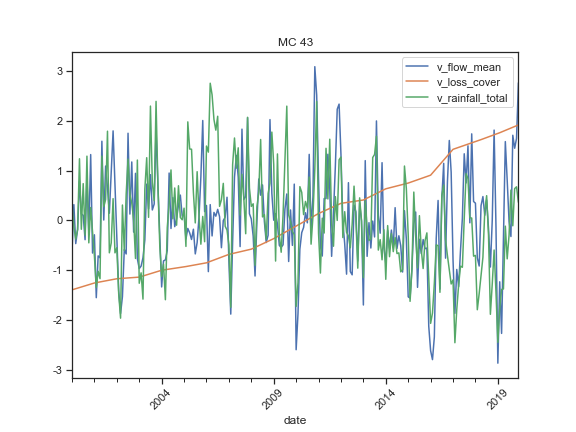

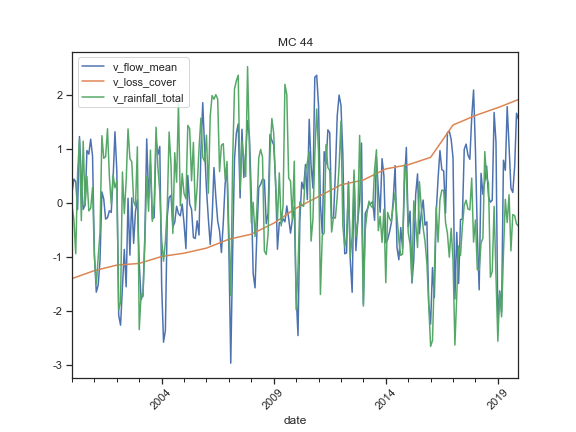

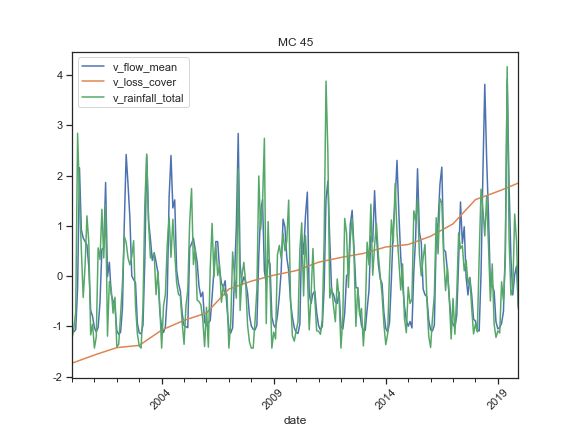

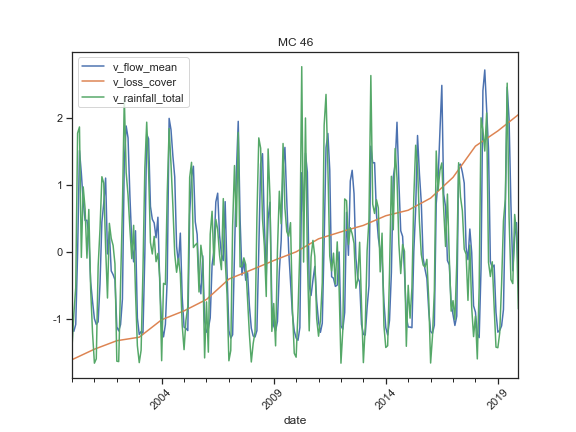

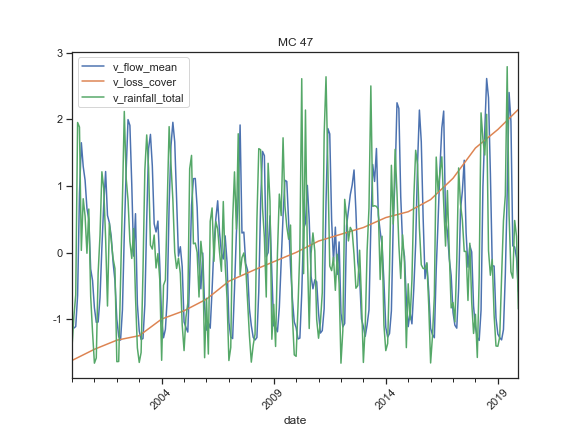

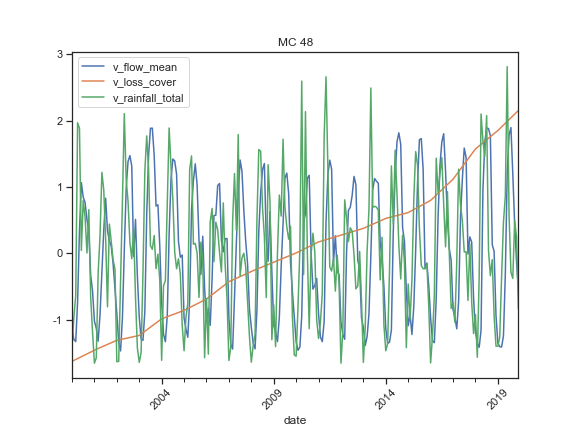

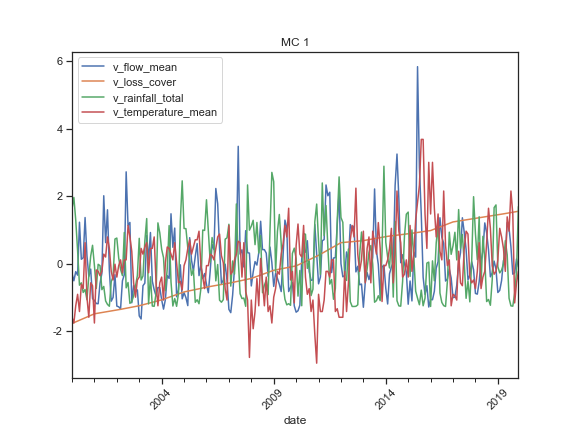

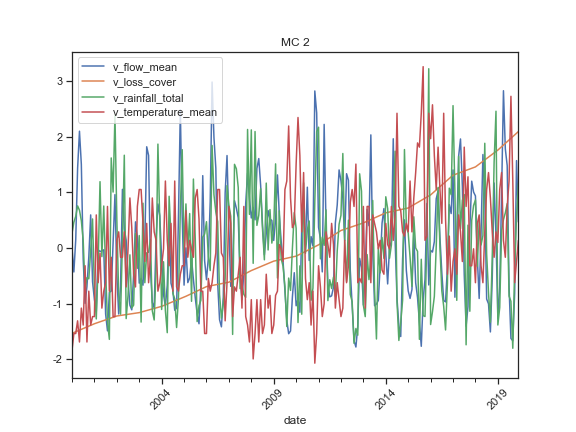

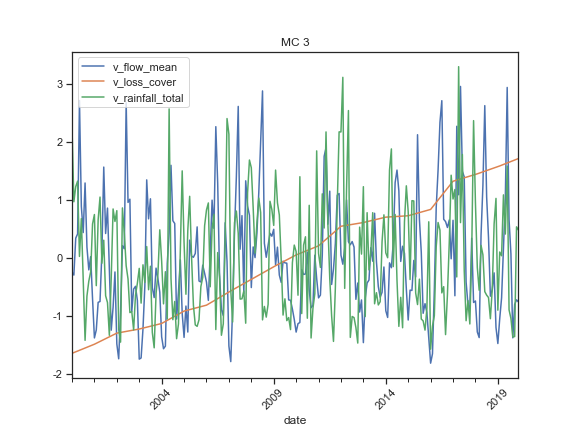

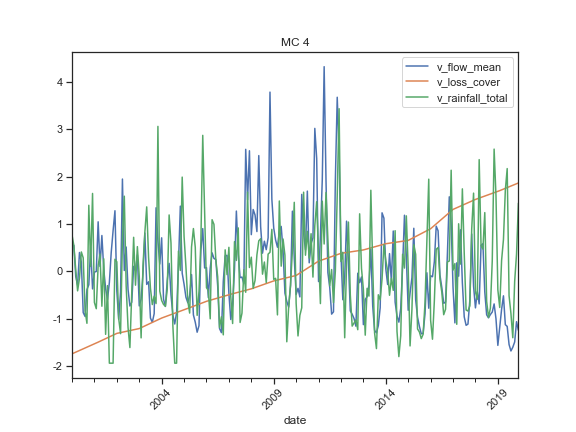

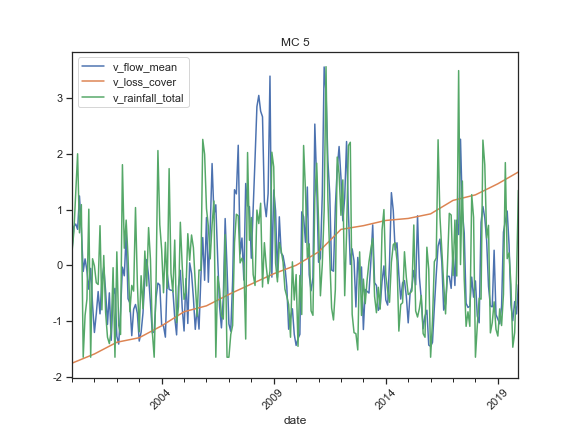

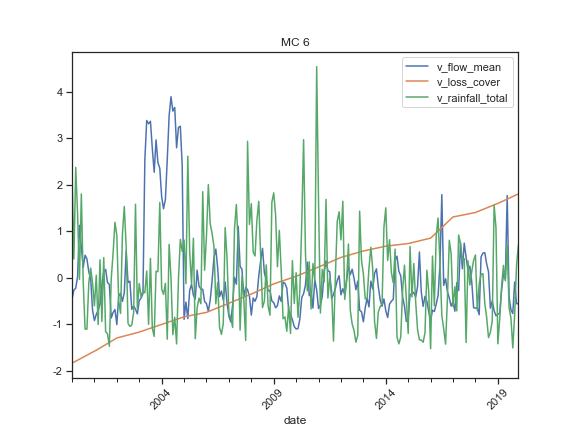

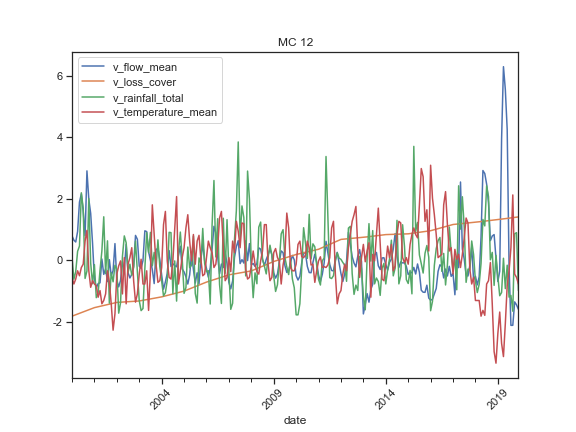

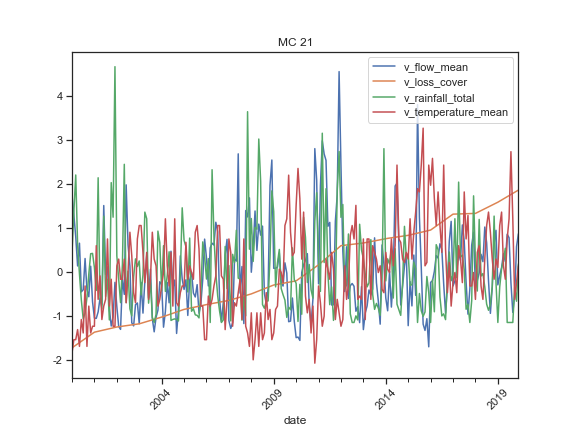

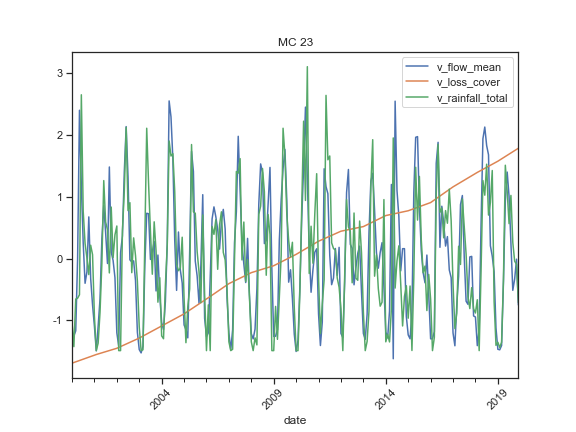

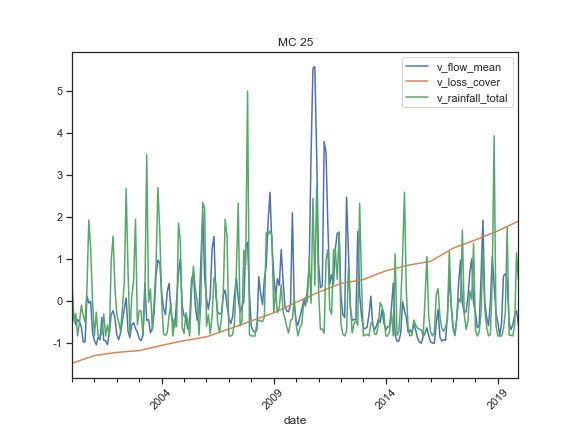

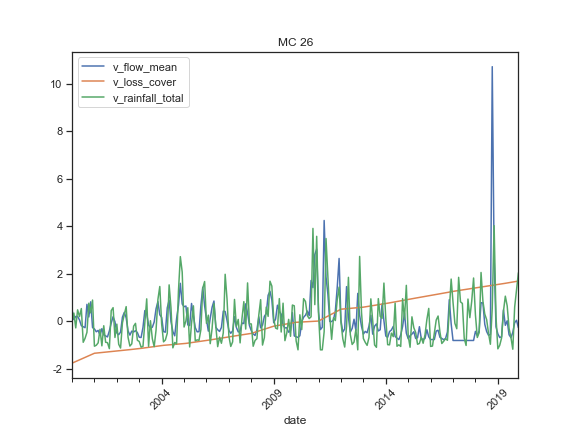

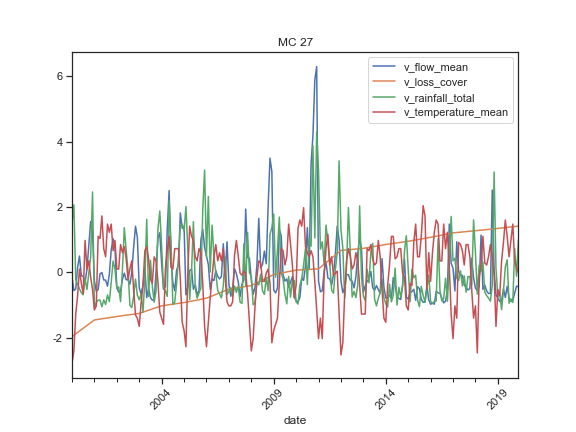

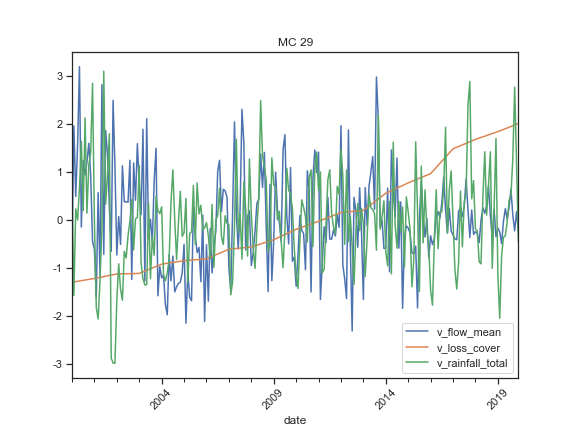

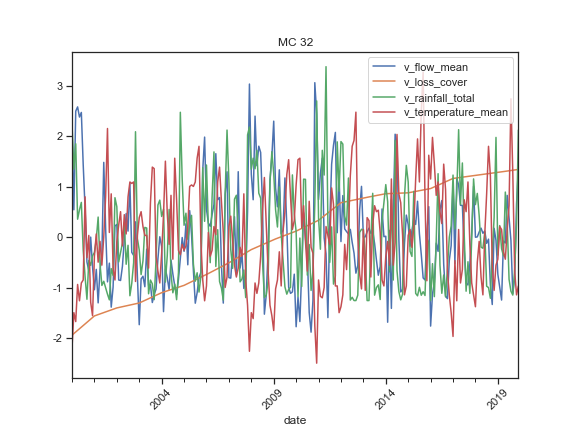

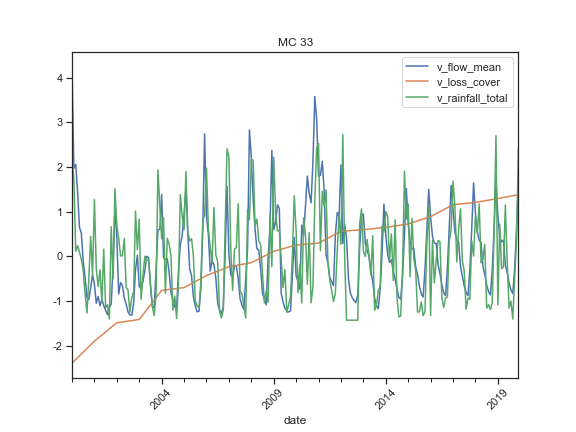

In [66]:
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
for mc in basins[:]:
    dfc = df.loc[mc].copy()
    
    has_temperature = True
    
    if np.isnan(dfc.iloc[0,4]):
        has_temperature = False
        dfc.drop(['v_temperature_mean'], axis = 1, inplace = True)
    
    if True:
        dfc.set_index(['date'], inplace = True)
        dfc = pd.DataFrame(preprocessing.StandardScaler().fit_transform(dfc.values), index = dfc.index, columns=dfc.columns)
        #dfc.reset_index(inplace = True)
    elif False:
        dfc.v_flow_mean = dfc.v_flow_mean * 1
        dfc.v_loss_cover = dfc.v_loss_cover * 100
        dfc.v_rainfall_total = dfc.v_rainfall_total / 10
        dfc.v_temperature_mean = dfc.v_temperature_mean * 1
    
    if True:
        #plt.figure(figsize=(6,10))
        #sns.set_style('darkgrid')
        
        years_locator = mdates.YearLocator()
        months_locator = mdates.MonthLocator()
        years_format = mdates.DateFormatter('%Y')

        sns.set_style('ticks')
        fig, ax = plt.subplots()
        fig.set_size_inches(8, 6)

        ax.ticklabel_format(axis='y', style='plain')
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

        ax.xaxis.set_major_locator(years_locator)
        ax.xaxis.set_major_formatter(years_format)
        ax.xaxis.set_minor_locator(months_locator)

        #sns.lineplot(x=dates, y=values, ci=None )
        #sns.set(rc={'figure.figsize':(7,4)})
        dfc.plot(kind = 'line', title = f'MC {mc}', ax=ax)
        plt.legend()#loc = 'upper right', shadow = True, bbox_to_anchor = (1.35, 0.8))

        rotation = 45
        plt.setp(ax.get_xticklabels(), rotation=rotation)
        #plt.xlabel('date', fontsize='16')
        #plt.ylabel('y_label', fontsize='16')
        #plt.title(title, fontsize='18')

        #plt.show()
        
        
        
        
#         sns.relplot(x="v_rainfall_total", y="v_flow_mean", data=dfc);

        #g = sns.pairplot(dfc, diag_kind='kde', kind='reg', markers='+', height=2, aspect=1)
        #g.fig.suptitle(f'MC {mc}', x=0.4, y=0.99)

        #sns.heatmap(dfc.corr(),cmap=sns.diverging_palette(220, 10, as_cmap=True))
        #plt.title("Correlation Matrix")

        ##plt.show()
        
        p = image_path.format(cuenca = mc, tipo = 'ts') 
        plt.savefig(p)
    
    if False:
        model = 'v_flow_mean~v_loss_cover + v_rainfall_total'
        if has_temperature:
            model = 'v_flow_mean~v_loss_cover + v_rainfall_total + v_temperature_mean'

        lm = sm.ols(formula = model, data = dfc).fit()
        #print(lm.summary())
        lmsum = f'MC:{mc} R2:{round(lm.rsquared, 3)},AIC:{round(lm.aic, 3)},v_loss_cover:{round(lm.params["v_loss_cover"], 3)}({lm.pvalues["v_loss_cover"]<0.05}),v_rainfall_total:{round(lm.params["v_rainfall_total"], 3)}({lm.pvalues["v_rainfall_total"]<0.05})'
        if has_temperature:
            lmsum += f'v_temperature_mean:{round(lm.params["v_temperature_mean"], 3)}({lm.pvalues["v_temperature_mean"]<0.05})'
        print(lmsum)
        
    
    if False:
        stationary = False
        tries = 1
        df_diff = None
        stationary = adf_test(dfc.v_flow_mean)
        
        while not stationary and tries <= 3:
            df_diff = dfc.v_flow_mean.diff().dropna()
            stationary = adf_test(df_diff)
            tries += 1
        
        sns.set(rc={'figure.figsize':(6,5)})
        sns.set_style('darkgrid')
            
        if(stationary and tries > 1):
            #display(df_diff.head())
            dfc.v_flow_mean.plot(kind = 'line', title = f'MC {mc}-{tries-1}')
            
            df_diff.plot(kind = 'line', title = f'MC {mc}-{tries-1}')
            
            dfv = dfc.v_flow_mean - df_diff
            dfv.plot(kind = 'line', title = f'MC {mc}')
            plt.show()


In [51]:
def plotData(macrobasin, variables, year):
    plt.figure(figsize=(5,7))
    for i, var in enumerate(variables):
        plt.subplot(len(variables),1,i+1)
        dfc = df.loc[macrobasin].copy()
        dfc = dfc[dfc.date.dt.year == year]
        dfc[['date', var]].plot(x='date', y=var, kind = 'line', title = f'MC {macrobasin}-{var}')

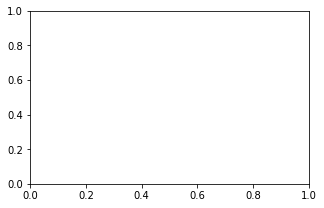

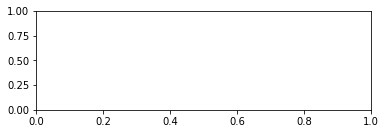

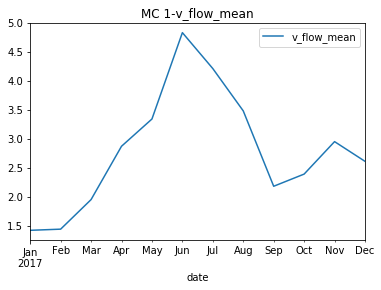

In [52]:
plotData(1, ['v_rainfall_total','v_flow_mean'], 2017) #", y="